In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_full = pd.read_csv("passengers.csv")

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Преобразование столбца Month в datetime
df_full['Month'] = pd.to_datetime(df_full['Month'], format='%Y-%m')
df_full.set_index('Month', inplace=True)

In [6]:
df_full.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [8]:
df_full.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
print(f"Диапазон дат: {df_full.index.min()} - {df_full.index.max()}")

Диапазон дат: 1949-01-01 00:00:00 - 1960-12-01 00:00:00


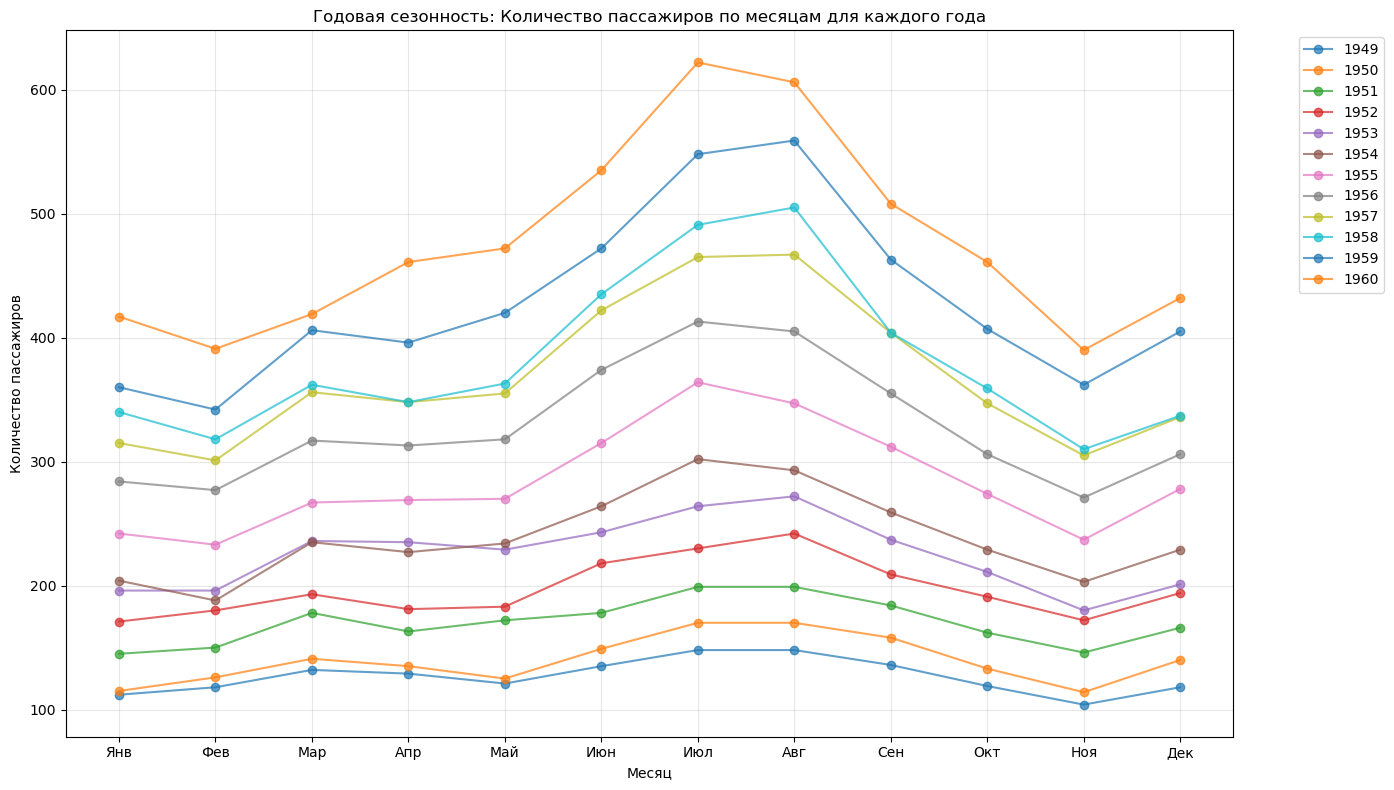

In [13]:
# 1.1 Годовой график сезонности
plt.figure(figsize=(14, 8))


for i, year in enumerate(df_full.index.year.unique()):
    year_data = df_full[df_full.index.year == year]
    plt.plot(year_data.index.month, year_data['Passengers'], 
             marker='o', label=str(year), alpha=0.7)

plt.xlabel('Месяц')
plt.ylabel('Количество пассажиров')
plt.title('Годовая сезонность: Количество пассажиров по месяцам для каждого года')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                          'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Наблюдается явно выраженная годовая сезонность:
1. Пиковые значения приходятся на летние месяцы (июль-август)
2. Минимальные значения наблюдаются поздней осенью и зимой
3. Рост пассажиропотока начинается весной (март-апрель)
4. Спад начинается осенью (сентябрь-октябрь)

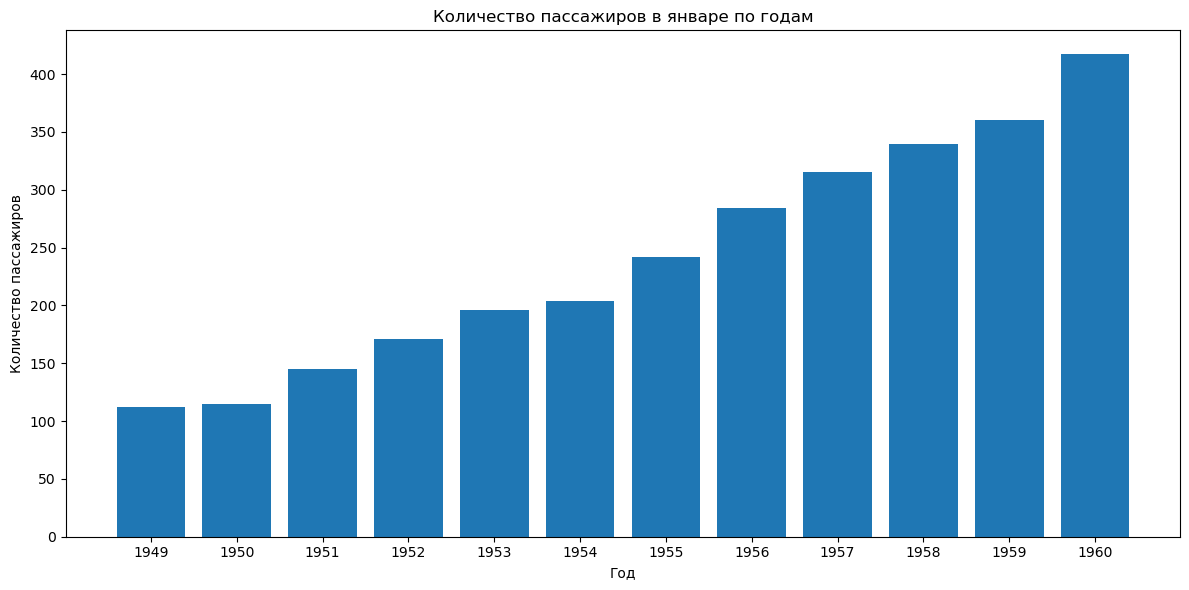

Среднее за январь: 242 пассажиров
Стандартное отклонение: 101
Минимум: 112 (1949 г.)
Максимум: 417 (1960 г.)
Тренд: положительный


In [21]:
# 2.1 Январь по годам
january_data = df_full[df_full.index.month == 1]

plt.figure(figsize=(12, 6))
plt.bar(january_data.index.year, january_data['Passengers'])
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.xticks(january_data.index.year)
plt.title('Количество пассажиров в январе по годам')
plt.tight_layout()
plt.show()


print(f"Среднее за январь: {january_data['Passengers'].mean():.0f} пассажиров")
print(f"Стандартное отклонение: {january_data['Passengers'].std():.0f}")
print(f"Минимум: {january_data['Passengers'].min()} ({january_data['Passengers'].idxmin().year} г.)")
print(f"Максимум: {january_data['Passengers'].max()} ({january_data['Passengers'].idxmax().year} г.)")
print(f"Тренд: {'положительный' if january_data['Passengers'].iloc[-1] > january_data['Passengers'].iloc[0] else 'отрицательный'}")

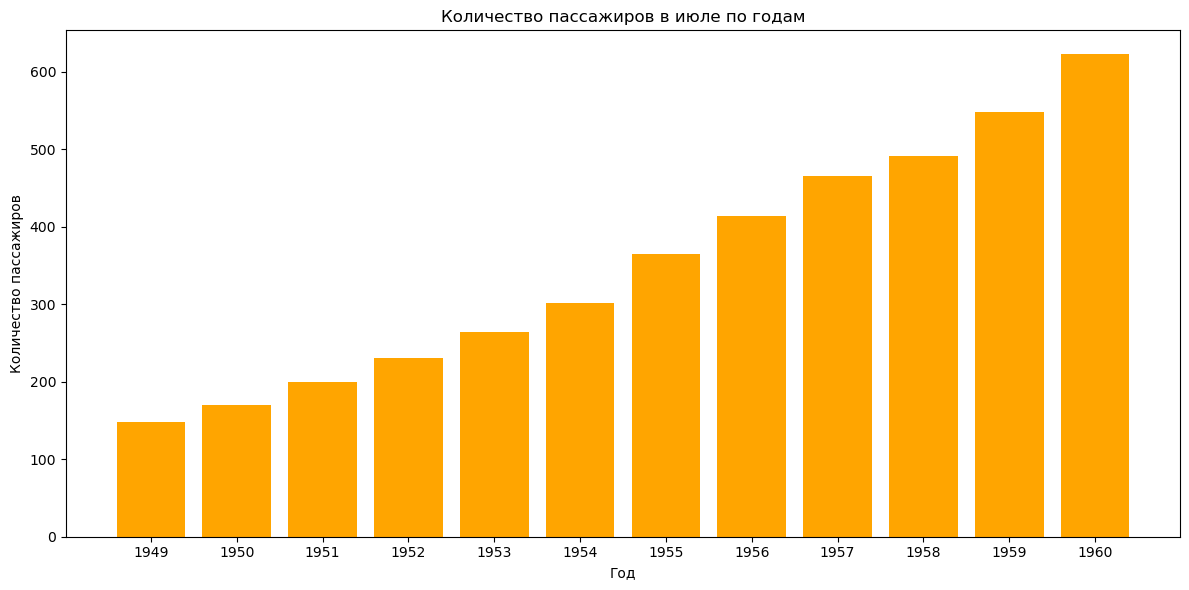

Среднее за июль: 351 пассажиров
Стандартное отклонение: 157
Минимум: 148 (1949 г.)
Максимум: 622 (1960 г.)
Тренд: положительный


In [22]:
# 2.2 Июль по годам
july_data = df_full[df_full.index.month == 7]

plt.figure(figsize=(12, 6))
plt.bar(july_data.index.year, july_data['Passengers'], color='orange')
plt.xlabel('Год')
plt.xticks(january_data.index.year)
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров в июле по годам')
plt.tight_layout()
plt.show()

print(f"Среднее за июль: {july_data['Passengers'].mean():.0f} пассажиров")
print(f"Стандартное отклонение: {july_data['Passengers'].std():.0f}")
print(f"Минимум: {july_data['Passengers'].min()} ({july_data['Passengers'].idxmin().year} г.)")
print(f"Максимум: {july_data['Passengers'].max()} ({july_data['Passengers'].idxmax().year} г.)")
print(f"Тренд: {'положительный' if july_data['Passengers'].iloc[-1] > july_data['Passengers'].iloc[0] else 'отрицательный'}")

Среднее соотношение июль/январь: 1.45
Максимальная разница: 510 пассажиров


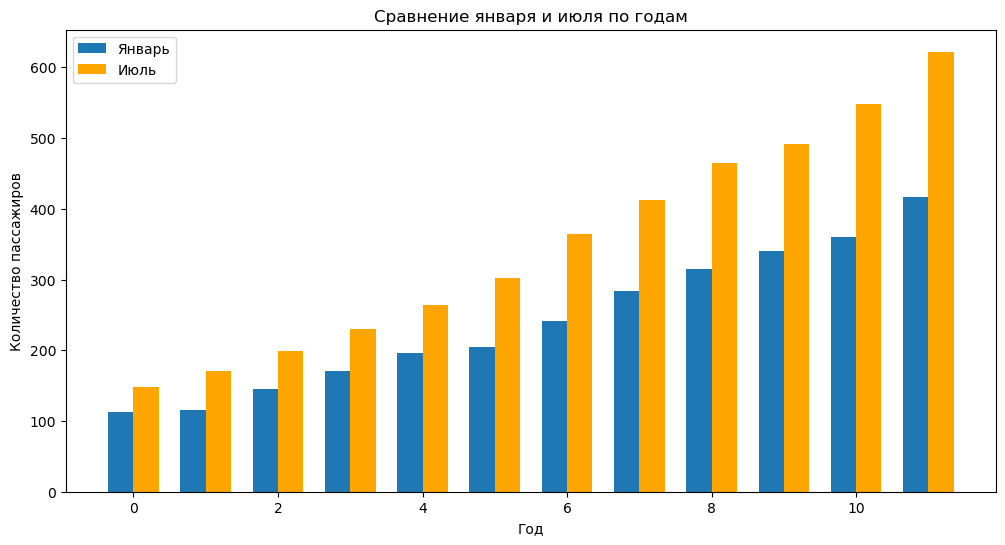

In [25]:
# 2.3 Сравнение января и июля
comparison_df = pd.DataFrame({
    'Январь': january_data['Passengers'].values,
    'Июль': july_data['Passengers'].values
}, index=january_data.index.year)

plt.figure(figsize=(12, 6))
x = np.arange(len(comparison_df))
width = 0.35
plt.bar(x - width/2, comparison_df['Январь'], width, label='Январь')
plt.bar(x + width/2, comparison_df['Июль'], width, label='Июль', color='orange')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.title('Сравнение января и июля по годам')
plt.legend()

print(f"Среднее соотношение июль/январь: {(july_data['Passengers'].mean() / january_data['Passengers'].mean()):.2f}")
print(f"Максимальная разница: {comparison_df['Июль'].max() - comparison_df['Январь'].min()} пассажиров")


Text(0, 0.5, 'Дисперсия')

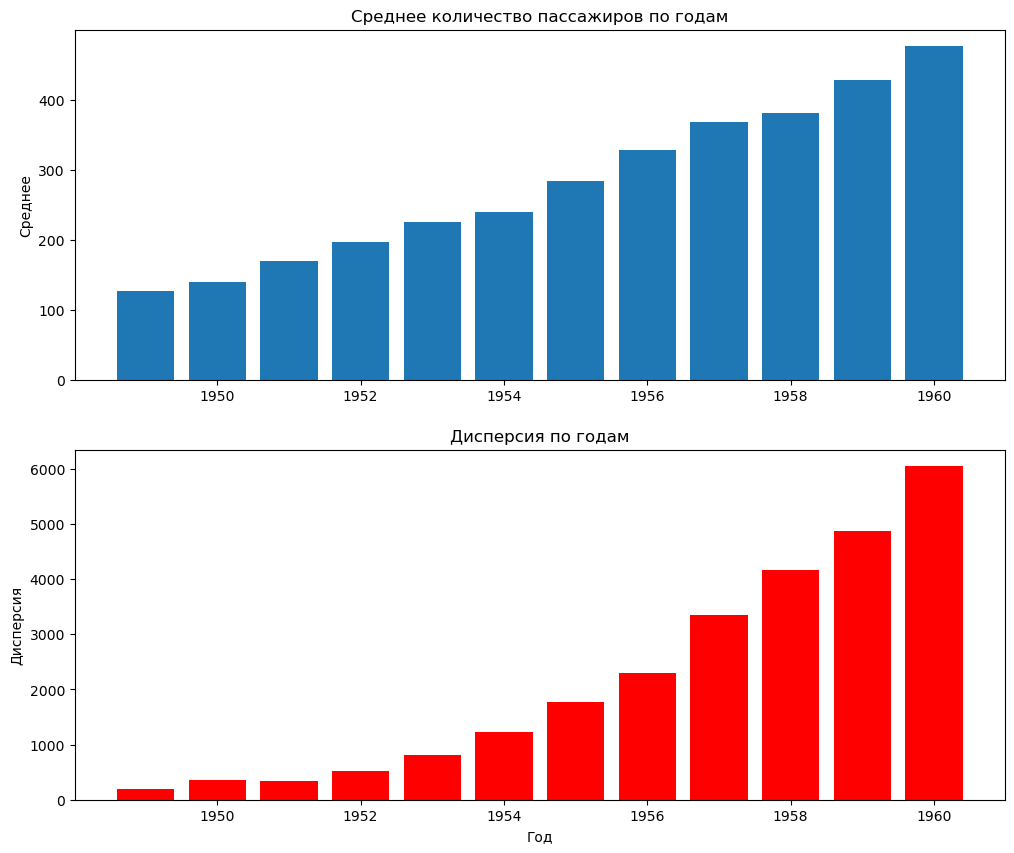

In [32]:
# 3. Среднее и дисперсия по годам
yearly_stats = df_full.groupby(df_full.index.year).agg({
    'Passengers': ['mean', 'var']
}).round(2)

yearly_stats.columns = ['Среднее', 'Дисперсия']

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].bar(yearly_stats.index, yearly_stats['Среднее'])
axes[0].set_title('Среднее количество пассажиров по годам')
axes[0].set_ylabel('Среднее')

axes[1].bar(yearly_stats.index, yearly_stats['Дисперсия'], color='red')
axes[1].set_title('Дисперсия по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Дисперсия')

Средняя абсолютная разность: 2
Максимальный рост: 87
Максимальный спад: -101
Стандартное отклонение: 34


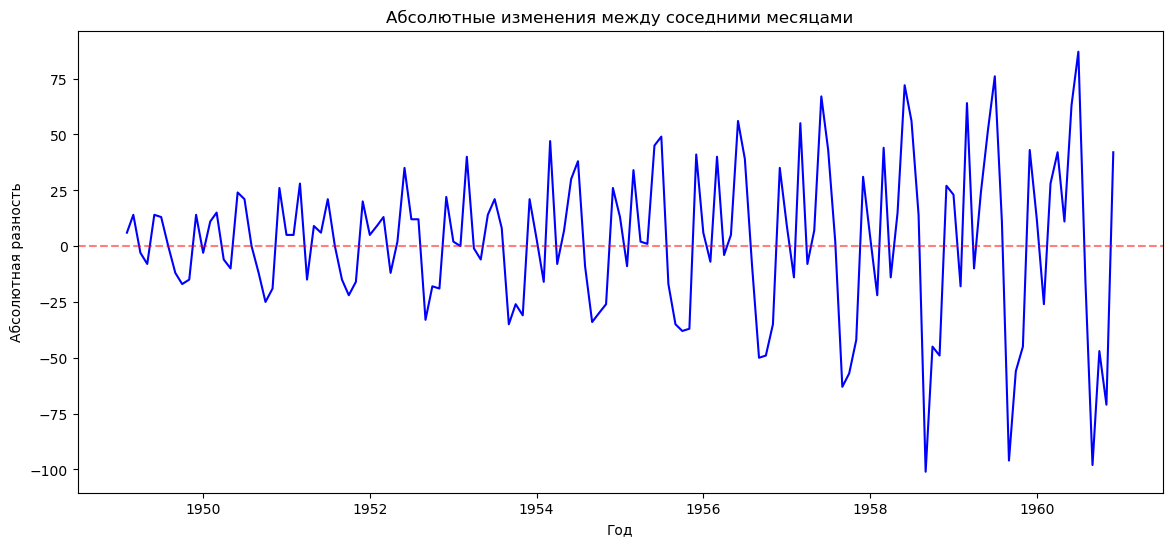

In [36]:
# 4.1 Абсолютные разности
df_full['Abs_Diff'] = df_full['Passengers'].diff()

plt.figure(figsize=(14, 6))
plt.plot(df_full.index, df_full['Abs_Diff'], 'b-')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Год')
plt.ylabel('Абсолютная разность')
plt.title('Абсолютные изменения между соседними месяцами')


print(f"Средняя абсолютная разность: {df_full['Abs_Diff'].mean():.0f}")
print(f"Максимальный рост: {df_full['Abs_Diff'].max():.0f}")
print(f"Максимальный спад: {df_full['Abs_Diff'].min():.0f}")
print(f"Стандартное отклонение: {df_full['Abs_Diff'].std():.0f}")

Среднее изменение: 1.52%
Максимальный рост: 25.00%
Максимальный спад: -20.00%
Стандартное отклонение: 10.76%


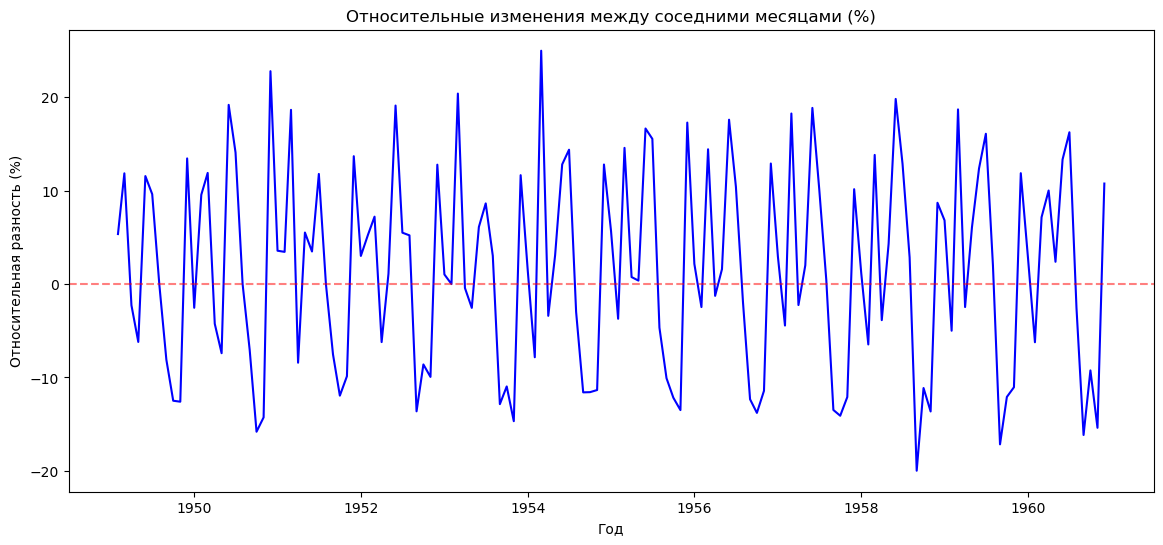

In [39]:
# 4.2 Относительные разности (%)
df_full['Pct_Diff'] = df_full['Passengers'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(df_full.index, df_full['Pct_Diff'], 'b-')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Год')
plt.ylabel('Относительная разность (%)')
plt.title('Относительные изменения между соседними месяцами (%)')

print(f"Среднее изменение: {df_full['Pct_Diff'].mean():.2f}%")
print(f"Максимальный рост: {df_full['Pct_Diff'].max():.2f}%")
print(f"Максимальный спад: {df_full['Pct_Diff'].min():.2f}%")
print(f"Стандартное отклонение: {df_full['Pct_Diff'].std():.2f}%")

In [46]:
# 5.1 Понижение частоты дискретизации

# Годовые агрегации
yearly_resampled = df_full['Passengers'].resample('Y').agg(['mean', 'sum', 'min', 'max'])

# Квартальные агрегации
quarterly_resampled = df_full['Passengers'].resample('Q').agg(['mean', 'sum'])

print("Годовые агрегации:")
print(yearly_resampled.tail())
print("\nКвартальные агрегации:")
print(quarterly_resampled)

Годовые агрегации:
                  mean   sum  min  max
Month                                 
1956-12-31  328.250000  3939  271  413
1957-12-31  368.416667  4421  301  467
1958-12-31  381.000000  4572  310  505
1959-12-31  428.333333  5140  342  559
1960-12-31  476.166667  5714  390  622

Квартальные агрегации:
                  mean   sum
Month                       
1949-03-31  120.666667   362
1949-06-30  128.333333   385
1949-09-30  144.000000   432
1949-12-31  113.666667   341
1950-03-31  127.333333   382
1950-06-30  136.333333   409
1950-09-30  166.000000   498
1950-12-31  129.000000   387
1951-03-31  157.666667   473
1951-06-30  171.000000   513
1951-09-30  194.000000   582
1951-12-31  158.000000   474
1952-03-31  181.333333   544
1952-06-30  194.000000   582
1952-09-30  227.000000   681
1952-12-31  185.666667   557
1953-03-31  209.333333   628
1953-06-30  235.666667   707
1953-09-30  257.666667   773
1953-12-31  197.333333   592
1954-03-31  209.000000   627
1954-06-30  241.6

Повышение частоты дискретизации до недели/дня:
1. Для недельной частоты можно использовать интерполяцию
2. Для дневной частоты потребуется дополнительная информация

Для данных более целесообразно рассматривать сезонность по месяцам, без повышения частоты

**Анализ неполного датасета**

In [74]:
df_incomplete = pd.read_csv("passengers2.csv")

In [75]:
df_incomplete['Month'] = pd.to_datetime(df_incomplete['Month'], format='%Y-%m')
df_incomplete.set_index('Month', inplace=True)

In [76]:
df_incomplete['target_filled'] = df_incomplete['target'].interpolate(method='linear')

# Создаем датафрейм с восполненными данными
df_filled = df_incomplete.copy()
df_filled.rename(columns={'target_filled': 'Passengers'}, inplace=True)


In [77]:
df_filled.head()

,reference,target,missing,Passengers
Month,,,,
1949-01-01,112,112.0,NaN,112.0
1949-02-01,118,118.0,NaN,118.0
1949-03-01,132,132.0,NaN,132.0
1949-04-01,129,NaN,129.0,126.5
1949-05-01,121,121.0,NaN,121.0


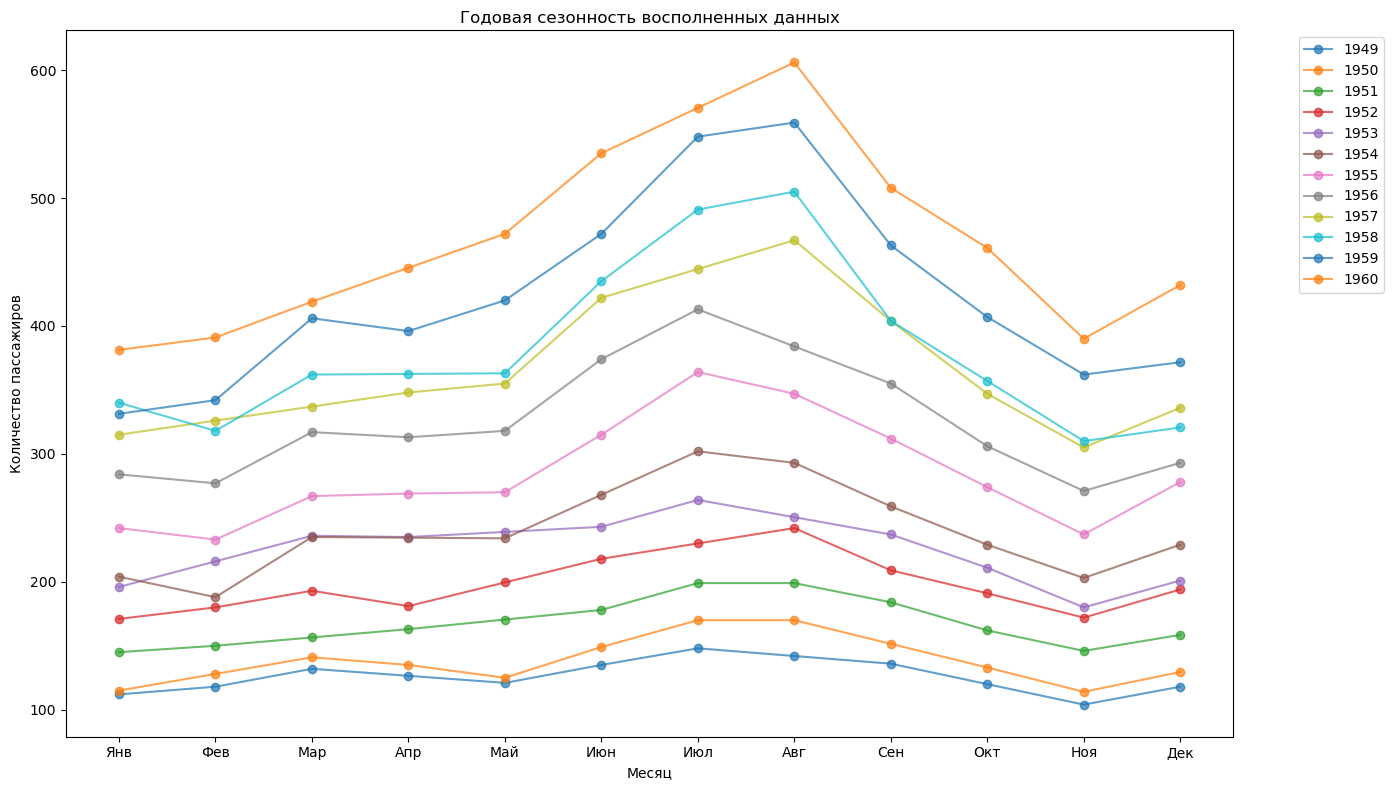

In [79]:
plt.figure(figsize=(14, 8))

# Получаем уникальные годы
years = df_filled.index.year.unique()

# График по годам
for i, year in enumerate(years):
    year_data = df_filled[df_filled.index.year == year]
    plt.plot(year_data.index.month, year_data['Passengers'], 
             marker='o', label=str(year), alpha=0.7)

plt.xlabel('Месяц')
plt.ylabel('Количество пассажиров')
plt.title('Годовая сезонность восполненных данных')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                          'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. Сохраняется четкая годовая сезонность
2. Пиковые значения наблюдаются в июле-августе
3. Минимальные значения - в январе-феврале
4. Графики показывают плавные переходы между месяцами
5. Интерполяция сохранила общую форму сезонных колебаний

Среднее за январь: 236 пассажиров
Стандартное отклонение: 93
Минимум: 112
Максимум: 381


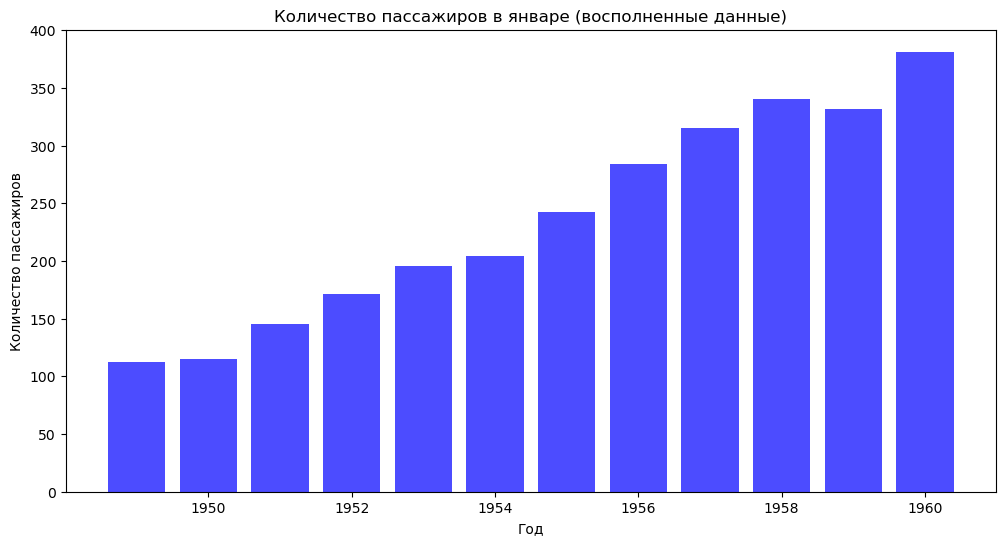

In [80]:
# 2.1 Январь по годам
january_filled = df_filled[df_filled.index.month == 1]

plt.figure(figsize=(12, 6))
plt.bar(january_filled.index.year, january_filled['Passengers'], color='blue', alpha=0.7)
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров в январе (восполненные данные)')

print(f"Среднее за январь: {january_filled['Passengers'].mean():.0f} пассажиров")
print(f"Стандартное отклонение: {january_filled['Passengers'].std():.0f}")
print(f"Минимум: {january_filled['Passengers'].min():.0f}")
print(f"Максимум: {january_filled['Passengers'].max():.0f}")

Среднее за июль: 345 пассажиров
Стандартное отклонение: 148
Минимум: 148
Максимум: 570


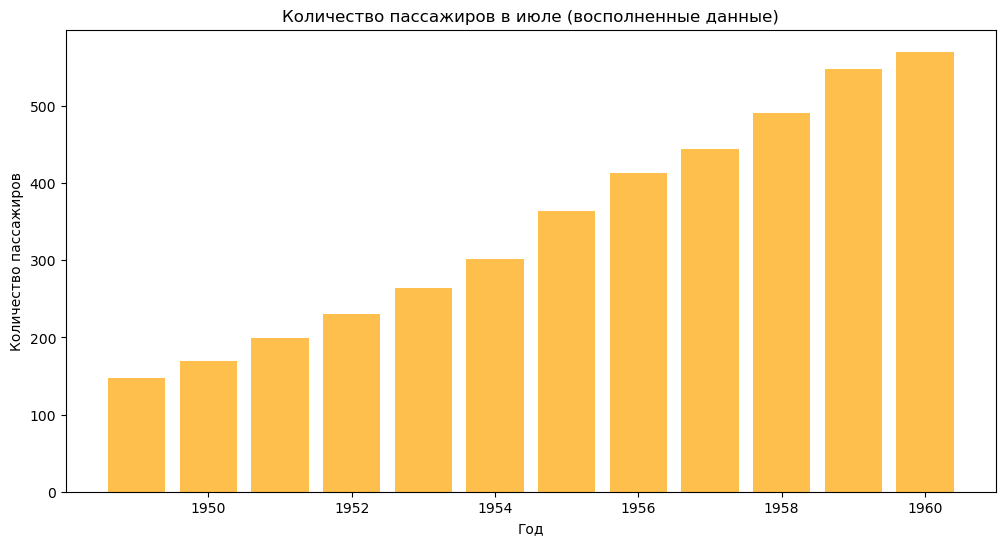

In [81]:
# 2.2 Июль по годам
july_filled = df_filled[df_filled.index.month == 7]

plt.figure(figsize=(12, 6))
plt.bar(july_filled.index.year, july_filled['Passengers'], color='orange', alpha=0.7)
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров в июле (восполненные данные)')

print(f"Среднее за июль: {july_filled['Passengers'].mean():.0f} пассажиров")
print(f"Стандартное отклонение: {july_filled['Passengers'].std():.0f}")
print(f"Минимум: {july_filled['Passengers'].min():.0f}")
print(f"Максимум: {july_filled['Passengers'].max():.0f}")


       Среднее  Дисперсия
Month                    
1949    126.04     166.02
1950    138.42     348.95
1951    167.62     354.82
1952    198.38     508.14
1953    225.71     615.38
1954    239.88    1227.28
1955    284.00    1775.82
1956    325.42    2096.99
1957    367.21    2854.07
1958    380.68    4259.47
1959    423.17    5520.41
1960    467.61    5402.71


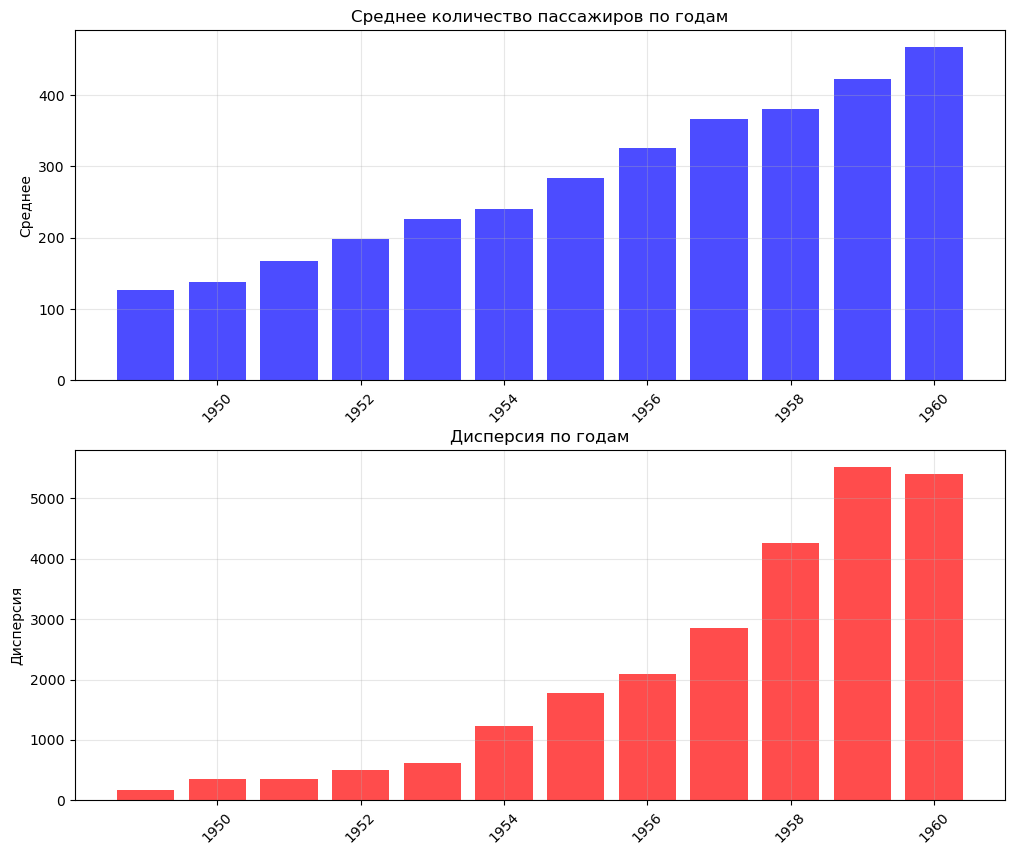

In [88]:
# Группировка по годам
yearly_stats_filled = df_filled.groupby(df_filled.index.year).agg({
    'Passengers': ['mean', 'var']
}).round(2)

yearly_stats_filled.columns = ['Среднее', 'Дисперсия']

print(yearly_stats_filled)

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Среднее по годам
axes[0].bar(yearly_stats_filled.index, yearly_stats_filled['Среднее'], color='blue', alpha=0.7)
axes[0].set_title('Среднее количество пассажиров по годам')
axes[0].set_ylabel('Среднее')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Дисперсия по годам
axes[1].bar(yearly_stats_filled.index, yearly_stats_filled['Дисперсия'], color='red', alpha=0.7)
axes[1].set_title('Дисперсия по годам')
axes[1].set_ylabel('Дисперсия')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

[Text(1, 0, 'Янв'),
 Text(2, 0, 'Фев'),
 Text(3, 0, 'Мар'),
 Text(4, 0, 'Апр'),
 Text(5, 0, 'Май'),
 Text(6, 0, 'Июн'),
 Text(7, 0, 'Июл'),
 Text(8, 0, 'Авг'),
 Text(9, 0, 'Сен'),
 Text(10, 0, 'Окт'),
 Text(11, 0, 'Ноя'),
 Text(12, 0, 'Дек')]

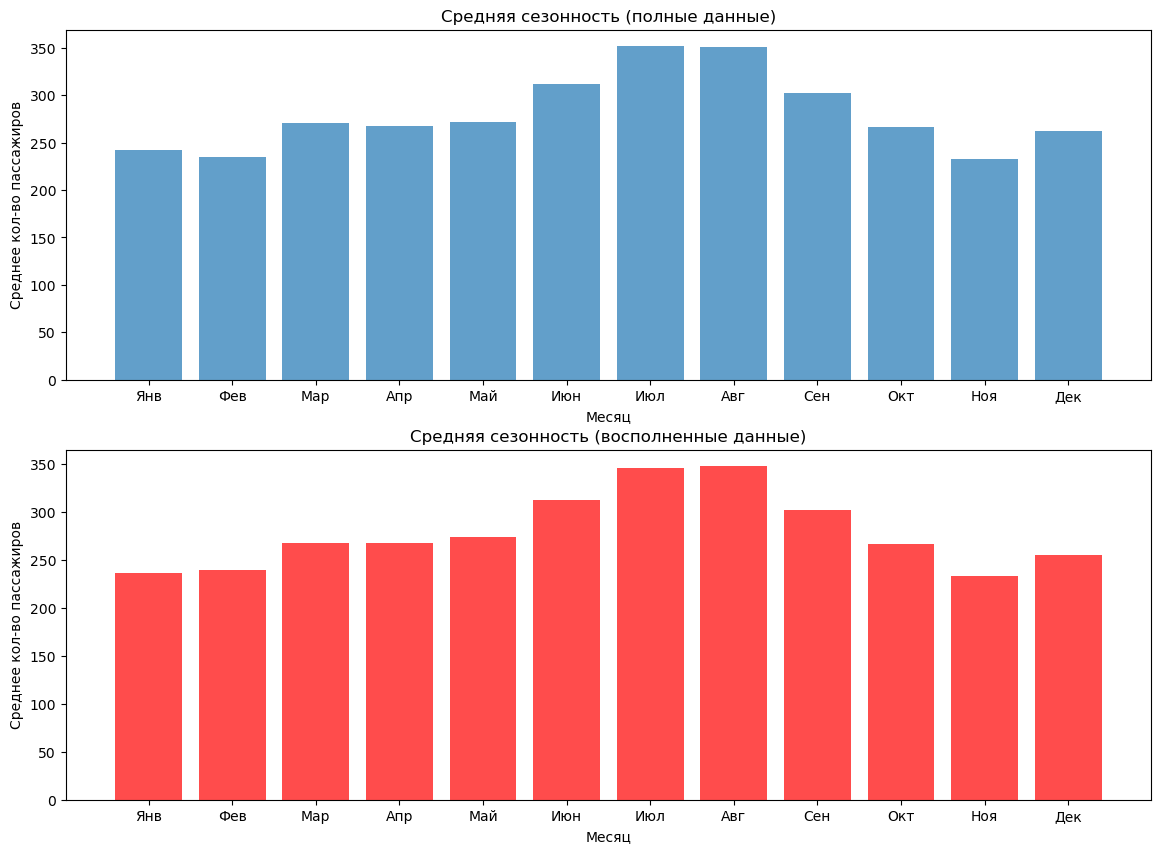

In [62]:
# 4. Сравнение сезонности
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Сезонность полных данных
monthly_full = df_full.groupby(df_full.index.month)['Passengers'].mean()
axes[0].bar(monthly_full.index, monthly_full, alpha=0.7)
axes[0].set_title('Средняя сезонность (полные данные)')
axes[0].set_xlabel('Месяц')
axes[0].set_ylabel('Среднее кол-во пассажиров')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])

# Сезонность восполненных данных
monthly_filled = df_filled.groupby(df_filled.index.month)['Passengers'].mean()
axes[1].bar(monthly_filled.index, monthly_filled, alpha=0.7, color='red')
axes[1].set_title('Средняя сезонность (восполненные данные)')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Среднее кол-во пассажиров')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])


In [86]:
# 5.1 Понижение частоты дискретизации

# Годовые агрегации
yearly_filled = df_filled['Passengers'].resample('Y').agg(['mean', 'sum', 'min', 'max', 'std'])

# Квартальные агрегации
quarterly_filled = df_filled['Passengers'].resample('Q').agg(['mean', 'sum', 'std'])

print("Годовые агрегации:")
print(yearly_filled.round(2))
print("\nКвартальные агрегации:")
print(quarterly_filled.round(2))


Годовые агрегации:
              mean      sum     min    max    std
Month                                            
1949-12-31  126.04  1512.50  104.00  148.0  12.88
1950-12-31  138.42  1661.00  114.00  170.0  18.68
1951-12-31  167.62  2011.50  145.00  199.0  18.84
1952-12-31  198.38  2380.50  171.00  242.0  22.54
1953-12-31  225.71  2708.50  180.00  264.0  24.81
1954-12-31  239.88  2878.50  188.00  302.0  35.03
1955-12-31  284.00  3408.00  233.00  364.0  42.14
1956-12-31  325.42  3905.00  271.00  413.0  45.79
1957-12-31  367.21  4406.50  305.00  467.0  53.42
1958-12-31  380.68  4568.17  310.00  505.0  65.26
1959-12-31  423.17  5078.00  331.33  559.0  74.30
1960-12-31  467.61  5611.33  381.33  606.0  73.50

Квартальные агрегации:
              mean      sum    std
Month                             
1949-03-31  120.67   362.00  10.26
1949-06-30  127.50   382.50   7.05
1949-09-30  142.00   426.00   6.00
1949-12-31  114.00   342.00   8.72
1950-03-31  128.00   384.00  13.00
1950-06-30  

ВОЗМОЖНЫЕ ВАРИАНТЫ ПОВЫШЕНИЯ ЧАСТОТЫ: \
Повышение до недельной частоты:
- Использовать resample('W')
- Использовать resample('D')

Для данных более целесообразно рассматривать сезонность по месяцам, без повышения частоты

In [91]:
# Сравнение с reference данными для оценки точности
differences = df_filled['Passengers'] - df_incomplete['reference']

print(f"Средняя абсолютная ошибка (MAE): {abs(differences).mean():.2f}")
print(f"Среднеквадратичная ошибка (RMSE): {np.sqrt((differences**2).mean()):.2f}")
print(f"Максимальная положительная разность: {differences.max():.2f}")
print(f"Максимальная отрицательная разность: {differences.min():.2f}")
print(f"Корреляция: {df_filled['Passengers'].corr(df_incomplete['reference']):.4f}")

Средняя абсолютная ошибка (MAE): 3.02
Среднеквадратичная ошибка (RMSE): 8.59
Максимальная положительная разность: 25.00
Максимальная отрицательная разность: -51.50
Корреляция: 0.9976
